# Numpy

Материалы:
* Макрушин С.В. "Лекция 1: Библиотека Numpy"
* https://numpy.org/doc/stable/user/index.html
* https://numpy.org/doc/stable/reference/index.html

## Задачи для совместного разбора

1. Сгенерировать двухмерный массив `arr` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в диапазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида  $𝑎𝑥+𝑏$  так, что после нормализации максимальный элемент масcива будет равен 1.0, минимальный 0.0

In [1]:
import numpy as np

In [2]:
arr = np.random.randint(0, 20, size = (4, 7))
arr

array([[ 8,  5, 19, 10,  3,  1, 18],
       [12,  1,  9,  4, 10, 14, 10],
       [18, 12, 16, 14,  0, 16,  7],
       [14, 14, 19,  7, 18,  9,  3]])

In [3]:
# ax + b
# x = arr, a = 1 / np.max(arr)-np.min(arr), b = np.min(arr)/np.max(arr)-np.min(arr)
arr_norm = arr * (1 / (np.max(arr)-np.min(arr))) - (np.min(arr) / (np.max(arr)-np.min(arr)))
arr_norm

array([[0.42105263, 0.26315789, 1.        , 0.52631579, 0.15789474,
        0.05263158, 0.94736842],
       [0.63157895, 0.05263158, 0.47368421, 0.21052632, 0.52631579,
        0.73684211, 0.52631579],
       [0.94736842, 0.63157895, 0.84210526, 0.73684211, 0.        ,
        0.84210526, 0.36842105],
       [0.73684211, 0.73684211, 1.        , 0.36842105, 0.94736842,
        0.47368421, 0.15789474]])

In [4]:
# arr_norm1 = (arr - np.min(arr))/np.ptp(arr)
# arr_norm1

2. Создать матрицу 8 на 10 из случайных целых (используя модуль `numpy.random`) чисел из диапозона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [5]:
arr = np.random.randint(0, 10, size = (8, 10))
arr

array([[1, 5, 7, 1, 8, 3, 4, 1, 3, 7],
       [3, 0, 3, 2, 0, 3, 7, 8, 2, 3],
       [6, 0, 6, 5, 5, 7, 9, 3, 6, 0],
       [0, 4, 6, 9, 1, 2, 7, 3, 1, 7],
       [0, 9, 5, 5, 4, 5, 5, 4, 8, 8],
       [8, 6, 8, 7, 1, 7, 3, 7, 6, 4],
       [7, 5, 6, 9, 5, 3, 3, 9, 7, 9],
       [5, 1, 1, 1, 0, 9, 4, 2, 9, 9]])

In [7]:
# ответ = индекс, строка
np.argmin(arr.sum(axis=1)), arr[3, :]

(1, array([0, 4, 6, 9, 1, 2, 7, 3, 1, 7]))

3. Найти евклидово расстояние между двумя одномерными векторами одинаковой размерности.

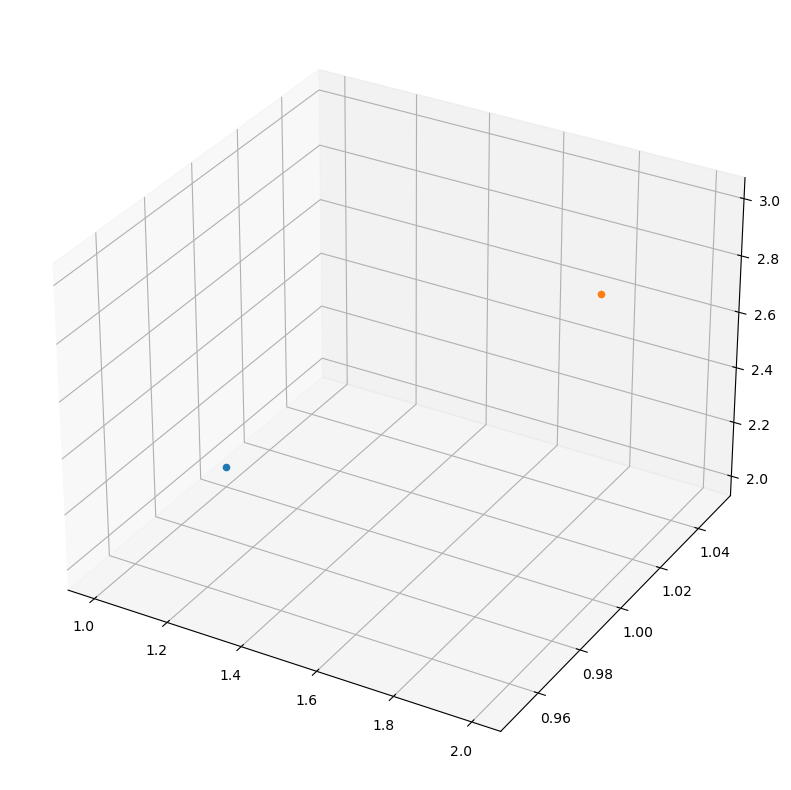

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(1, 1, 2)
ax.scatter(2, 1, 3)
plt.show();

In [25]:
# первый способ
point_1 = np.array((1, 1, 2))
point_2 = np.array((2, 1, 3))
distance = np.sqrt(np.sum(np.square(point_1 - point_2)))
distance

1.4142135623730951

In [26]:
# второй способ - l2 норма
distance = np.linalg.norm(point_1-point_2)
distance

1.4142135623730951

4. Решить матричное уравнение `A*X*B=-C` - найти матрицу `X`. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [17]:
# X = A**(-1) * C * B**(-1)
A=np.array([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]])
B=np.array([[3, -1], [2, 1]])
C=np.array([[7, 21], [11, 8], [8, 4]])
A, B, -C

(array([[-1,  2,  4],
        [-3,  1,  2],
        [-3,  0,  1]]),
 array([[ 3, -1],
        [ 2,  1]]),
 array([[ -7, -21],
        [-11,  -8],
        [ -8,  -4]]))

In [19]:
X = np.linalg.inv(A) @ (-1 * C) @ np.linalg.inv(B)
X

array([[ 1.00000000e+00,  1.11022302e-15],
       [-2.00000000e+00,  1.00000000e+00],
       [ 3.00000000e+00, -4.00000000e+00]])

In [20]:
A @ X @ B

array([[ -7., -21.],
       [-11.,  -8.],
       [ -8.,  -4.]])

## Лабораторная работа №1

Замечание: при решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использования функционала библиотеки `numpy`.

1. Файл `minutes_n_ingredients.csv` содержит информацию об идентификаторе рецепта, времени его выполнения в минутах и количестве необходимых ингредиентов. Считайте данные из этого файла в виде массива `numpy` типа `int32`, используя `np.loadtxt`. Выведите на экран первые 5 строк массива.

In [29]:
data = np.loadtxt('minutes_n_ingredients.csv', skiprows=1, delimiter=',', dtype='int32')
data

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       ...,
       [498432,     65,     15],
       [370915,      5,      4],
       [ 81993,    140,     14]], dtype=int32)

2. Вычислите среднее значение, минимум, максимум и медиану по каждому из столбцов, кроме первого.

In [30]:
# среднее значение
np.mean(data[:,1:], axis=0)

array([2.16010017e+04, 9.05528000e+00])

In [31]:
# минимум
np.min(data[:,1:], axis=0)

array([0, 1], dtype=int32)

In [32]:
# максимум
np.max(data[:,1:], axis=0)

array([2147483647,         39], dtype=int32)

In [33]:
# медианa
np.median(data[:,1:], axis=0)

array([40.,  9.])

3. Ограничьте сверху значения продолжительности выполнения рецепта значением квантиля $q_{0.75}$. 

In [34]:
# квантиль 𝑞0.75 
Q = np.quantile(data[:, 1], 0.75)
Q

65.0

In [35]:
# ограничение сверху
data = data[data[:, 1] <= Q]
data

array([[127244,     60,     16],
       [ 23891,     25,      7],
       [ 94746,     10,      6],
       ...,
       [ 43407,     35,      7],
       [498432,     65,     15],
       [370915,      5,      4]], dtype=int32)

In [36]:
data.shape

(75461, 3)

4. Посчитайте, для скольких рецептов указана продолжительность, равная нулю. Замените для таких строк значение в данном столбце на 1.

In [37]:
# кол-во рецептов с продолж-тью 0
len(np.where(data[:, 1] == 0)[0])

479

In [38]:
# Замена на 1
data[np.where(data[:, 1] == 0)] = 1

In [39]:
# проверка
len(np.where(data[:, 1] == 0)[0])

0

5. Посчитайте, сколько уникальных рецептов находится в датасете.

In [40]:
len(np.unique(data[:, 0]))

74983

6. Сколько и каких различных значений кол-ва ингредиентов присутвует в рецептах из датасета?

In [41]:
# кол-во значений кол-ва ингредиентов
len(np.unique(data[:, 2]))

32

In [42]:
# уникальные значения кол-ва ингредиентов
np.unique(data[:, 2])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34],
      dtype=int32)

7. Создайте версию массива, содержащую информацию только о рецептах, состоящих не более чем из 5 ингредиентов.

In [43]:
new_data = data[np.where(data[:,2] <= 5)]

In [44]:
# новая версия массива
new_data

array([[446597,     15,      5],
       [204134,      5,      3],
       [ 25623,      6,      4],
       ...,
       [ 52088,     60,      5],
       [128811,     15,      4],
       [370915,      5,      4]], dtype=int32)

8. Для каждого рецепта посчитайте, сколько в среднем ингредиентов приходится на одну минуту рецепта. Найдите максимальное значение этой величины для всего датасета

In [46]:
mean_indigrients = np.round(data[:,2]/data[:,1], 1)
mean_indigrients = mean_indigrients[:, np.newaxis]
# столбец кол-ва ингредиентов на 1 минуту рецепта
mean_indigrients

array([[0.3],
       [0.3],
       [0.6],
       ...,
       [0.2],
       [0.2],
       [0.8]])

In [47]:
# макс значение
np.max(mean_indigrients)

23.0

9. Вычислите среднее количество ингредиентов для топ-100 рецептов с наибольшей продолжительностью

In [51]:
# top100
top100 = data[data[:, 1].argsort()][::-1][:10]
top100

array([[188571,     65,     10],
       [ 41308,     65,     16],
       [131831,     65,      9],
       [242171,     65,     13],
       [367649,     65,     10],
       [240879,     65,      5],
       [ 92935,     65,     10],
       [ 86841,     65,      8],
       [372170,     65,     13],
       [352277,     65,     10]], dtype=int32)

In [53]:
# среднее кол-во ингредиентов с наибольшей продолжительностью
np.sum(top100[:, 1]) / 100

6.5

10. Выберите случайным образом и выведите информацию о 10 различных рецептах

In [54]:
#  индексы случайные
ind = np.random.randint(0, data.shape[0], 10)
ind

array([71703, 51780, 46727,  8517, 42388, 50138, 55461, 56787, 61224,
       50150])

In [55]:
# 10 случайных рецептов
data[ind]

array([[ 36220,      5,      3],
       [407665,      5,      8],
       [250923,     10,      6],
       [444881,     40,      9],
       [520832,     40,      7],
       [318860,     45,     11],
       [ 33924,     30,     13],
       [ 59972,     16,      7],
       [366943,     45,      9],
       [ 96767,     20,     12]], dtype=int32)

11. Выведите процент рецептов, кол-во ингредиентов в которых меньше среднего.

In [56]:
# среднее кол-во ингредиентов
np.mean(data[:,2])

8.576774757821921

In [61]:
# кол-во ингредиентов меньше среднего.
l = len(data[data[:,2] < np.mean(data[:,2])])
l

39855

In [62]:
answer = l / data.shape[0] * 100
np.round(answer)

53.0

12. Назовем "простым" такой рецепт, длительность выполнения которого не больше 20 минут и кол-во ингредиентов в котором не больше 5. Создайте версию датасета с дополнительным столбцом, значениями которого являются 1, если рецепт простой, и 0 в противном случае.

In [63]:
new_column0 = np.array([0] * data.shape[0])
new_column0

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
new_data2 = np.hstack([data, new_column0[:, np.newaxis]])
new_data2

array([[127244,     60,     16,      0],
       [ 23891,     25,      7,      0],
       [ 94746,     10,      6,      0],
       ...,
       [ 43407,     35,      7,      0],
       [498432,     65,     15,      0],
       [370915,      5,      4,      0]])

In [65]:
# Версия с доп колонкой
new_data2[:, 3][np.where((new_data2[:, 1] <= 20) & (new_data2[:, 2] <= 5))] = 1
new_data2

array([[127244,     60,     16,      0],
       [ 23891,     25,      7,      0],
       [ 94746,     10,      6,      0],
       ...,
       [ 43407,     35,      7,      0],
       [498432,     65,     15,      0],
       [370915,      5,      4,      1]])

13. Выведите процент "простых" рецептов в датасете

In [66]:
np.round(len(np.where(new_data2[:,3] == 1)[0]) * 100 / new_data2.shape[0])

13.0

14. Разделим рецепты на группы по следующему правилу. Назовем рецепты короткими, если их продолжительность составляет менее 10 минут; стандартными, если их продолжительность составляет более 10, но менее 20 минут; и длинными, если их продолжительность составляет не менее 20 минут. Создайте трехмерный массив, где нулевая ось отвечает за номер группы (короткий, стандартный или длинный рецепт), первая ось - за сам рецепт и вторая ось - за характеристики рецепта. Выберите максимальное количество рецептов из каждой группы таким образом, чтобы было возможно сформировать трехмерный массив. Выведите форму полученного массива.

In [74]:
new_column = np.array([0] * data.shape[0])
new_data = np.hstack([new_column[:, np.newaxis], data])
new_data[:, 0][np.where(data[:,1] < 10)] = 0 # short
new_data[:, 0][np.where((data[:,1] >= 10) & (data[:,1] < 20))] = 1 # standart
new_data[:, 0][np.where(data[:,1] >= 20)] = 2 # long

In [76]:
# версия массива с новой колонкой - названиями рецептов (0 - короткий, 1 - стандартный, 2 - длинный)
new_data, new_data.shape

(array([[     2, 127244,     60,     16],
        [     2,  23891,     25,      7],
        [     1,  94746,     10,      6],
        ...,
        [     2,  43407,     35,      7],
        [     2, 498432,     65,     15],
        [     0, 370915,      5,      4]]),
 (75461, 4))

In [82]:
# кол-во рецептов в каждой группе
short = len(new_data[:, 0][np.where(new_data[:, 0] == 0)])
standart = len(new_data[:, 0][np.where(new_data[:, 0] == 1)])
long = len(new_data[:, 0][np.where(new_data[:, 0] == 2)])
short, standart, long

(7588, 12661, 55212)

In [96]:
# возьмем в каждой группе по 7588 рецептов (максимально возможное кол-во)
data_short = new_data[new_data[:, 0].argsort()][:7588]
data_standart = new_data[new_data[:, 0].argsort()][7588:7588*2]
data_long = new_data[new_data[:, 0].argsort()][7588+12661:7588*2+12661]

In [99]:
data_long, data_standart, data_short

(array([[     2,  47319,     40,     12],
        [     2, 147361,     30,     13],
        [     2, 287412,     45,      3],
        ...,
        [     2, 427179,     60,      7],
        [     2, 215504,     35,     11],
        [     2, 102847,     25,      8]]),
 array([[     1,  67664,     10,      3],
        [     1, 438979,     15,     10],
        [     1, 372965,     10,     12],
        ...,
        [     1, 144604,     15,      9],
        [     1, 122658,     15,      7],
        [     1, 117695,     15,      5]]),
 array([[     0, 370915,      5,      4],
        [     0, 367440,      5,     17],
        [     0, 155506,      8,      6],
        ...,
        [     0,  29455,      5,      9],
        [     0, 283430,      5,      3],
        [     0,  13845,      5,      2]]))

In [100]:
data_long.shape, data_standart.shape, data_short.shape

((7588, 4), (7588, 4), (7588, 4))

In [149]:
# создание 3-мерного массива

data3D = np.zeros((3,7588,2))
data3D[0,:,:][:,0]=data_short[:,2]
data3D[0,:,:][:,1]=data_short[:,3]

data3D[1,:,:][:,0]=data_standart[:,2]
data3D[1,:,:][:,1]=data_standart[:,3]

data3D[2,:,:][:,0]=data_long[:,2]
data3D[2,:,:][:,1]=data_long[:,3]

In [150]:
data3D, data3D.shape

(array([[[ 5.,  4.],
         [ 5., 17.],
         [ 8.,  6.],
         ...,
         [ 5.,  9.],
         [ 5.,  3.],
         [ 5.,  2.]],
 
        [[10.,  3.],
         [15., 10.],
         [10., 12.],
         ...,
         [15.,  9.],
         [15.,  7.],
         [15.,  5.]],
 
        [[40., 12.],
         [30., 13.],
         [45.,  3.],
         ...,
         [60.,  7.],
         [35., 11.],
         [25.,  8.]]]),
 (3, 7588, 2))